# Evolución del salario mínimo vital y móvil

El objetivo de este análisis es observar la evolución del salario básico en Argentina a partir de 1993 hasta la actualidad, tanto en términos reales como en su valor en dólares, en los distintos períodos segmentados por presidente. Para eso, utilizaremos los datasets oficiales del gobierno que se encuentran en https://datos.gob.ar/ y que se actualizan regularmente.

*Fuentes*
* [Salario mínimo](https://datos.gob.ar/dataset/sspm-salario-minimo-vital-movil-pesos-corrientes/archivo/sspm_57.1)
* [Cotización del dólar](https://datos.gob.ar/dataset/sspm-tipo-cambio--usd---futuro-dolar/archivo/sspm_168.1)

## Importación de librerías a utilizar en el análisis

Utilizaremos Pandas para trabajar sobre el dataset en forma de objeto DataFrame, NumPy para realizar posibles operaciones matemáticas entre arrays, Matplotlib y Seaborn como herramientas de visualización, y DateTime y Matplotlib.Dates para trabajar con series de tiempo.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates

Cargamos los datasets en dos DataFrame distintos, indicando la columna de índice tiempo como index. Además, convertimos el índice en objetos DateTime ya que originalmente son strings.

In [41]:
df1 = pd.read_csv('indice-salario-minimo-vital-movil-valores-mensuales-pesos-corrientes-desde-1988.csv', index_col='indice_tiempo')
df1.index = pd.to_datetime(df1.index)

Observamos los tipos de datos y la cantidad de valores nulos para tener una idea del dataset. Además, visualizamos las primeras filas para ver qué tipos de datos tenemos.

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 675 entries, 1965-01-01 to 2021-03-01
Data columns (total 3 columns):
salario_minimo_vital_movil_mensual    675 non-null float64
salario_minimo_vital_movil_diario     675 non-null float64
salario_minimo_vital_movil_hora       675 non-null float64
dtypes: float64(3)
memory usage: 21.1 KB


In [43]:
df1.head()

,salario_minimo_vital_movil_mensual,salario_minimo_vital_movil_diario,salario_minimo_vital_movil_hora
indice_tiempo,,,
1965-01-01,9800.0,392.0,49.00
1965-02-01,9800.0,392.0,49.00
1965-03-01,9800.0,392.0,49.00
1965-04-01,9800.0,392.0,49.00
1965-05-01,11550.0,462.0,57.75


Para este trabajo, nos vamos a concentrar en el salario mínimo vital y móvil total y el tipo de cambio A3500, que es la cotización oficial del dólar que se puede adquirir por venta directa de entidades bancarias y financieras. Para facilitar el trabajo, dropeamos las otras columnas.

In [44]:
df1.drop(df1.columns.difference(['salario_minimo_vital_movil_mensual']), 1, inplace=True)

## Metodología de análisis

Me interesa ver cómo evolucionó el salario mínimo nominal en los distintos períodos o gobiernos. Elegí la primera etapa desde 1993 (año en el que Argentina pasó del austral al peso) hasta 2003, ya profundizada la crisis del 2001. Luego, separé por presidente: Néstor Kirchner (2003 a 2007), Cristina Fernández de Kirchner (2007 a 2015), Mauricio Macri (2015 a 2019) y Alberto Fernández (2019 al día de hoy).

In [45]:
noventas_a_2001 = df1.loc['1993-08-01':'2003-05-25']

nestor_kirchner = df1.loc['2003-05-25':'2007-12-01']

cfk = df1.loc['2007-12-01':'2015-12-01']

mauricio_macri = df1.loc['2015-12-01':'2019-12-01']

alberto_fernandez = df1.loc['2019-12-01':'2020-12-01']

In [46]:
noventas_a_2001.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 1993-08-01 to 2003-05-01
Data columns (total 1 columns):
salario_minimo_vital_movil_mensual    118 non-null float64
dtypes: float64(1)
memory usage: 1.8 KB


In [47]:
nestor_kirchner.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 2003-06-01 to 2007-12-01
Data columns (total 1 columns):
salario_minimo_vital_movil_mensual    55 non-null float64
dtypes: float64(1)
memory usage: 880.0 bytes


In [48]:
cfk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97 entries, 2007-12-01 to 2015-12-01
Data columns (total 1 columns):
salario_minimo_vital_movil_mensual    97 non-null float64
dtypes: float64(1)
memory usage: 1.5 KB


In [49]:
mauricio_macri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 2015-12-01 to 2019-12-01
Data columns (total 1 columns):
salario_minimo_vital_movil_mensual    49 non-null float64
dtypes: float64(1)
memory usage: 784.0 bytes


In [50]:
alberto_fernandez.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13 entries, 2019-12-01 to 2020-12-01
Data columns (total 1 columns):
salario_minimo_vital_movil_mensual    13 non-null float64
dtypes: float64(1)
memory usage: 208.0 bytes


## Visualización de los datos

Ya separado por período, procedemos a visualizar los datos como gráfico de línea (la mejor opción para observar la evolución a lo largo del tiempo de una variable). Como metodología, graficaré los períodos en orden, incorporando el siguiente al gráfico existente para observar la evolución a lo largo del tiempo.

### 1993 a 2003

En el gráifico siguiente se ve cómo la canasta básica se mantuvo en $200 luego de que pasamos de los australes a los pesos y hasta el 2003. Es crucial destacar que la década de 1990 se caracterizó por su bajísima inflación y que, a finales del 2001, ocurrió una devaluación brutal del peso argentino contra el dólar, por lo que el valor real de ese salario colapsó a un 20% de su valor nominal.

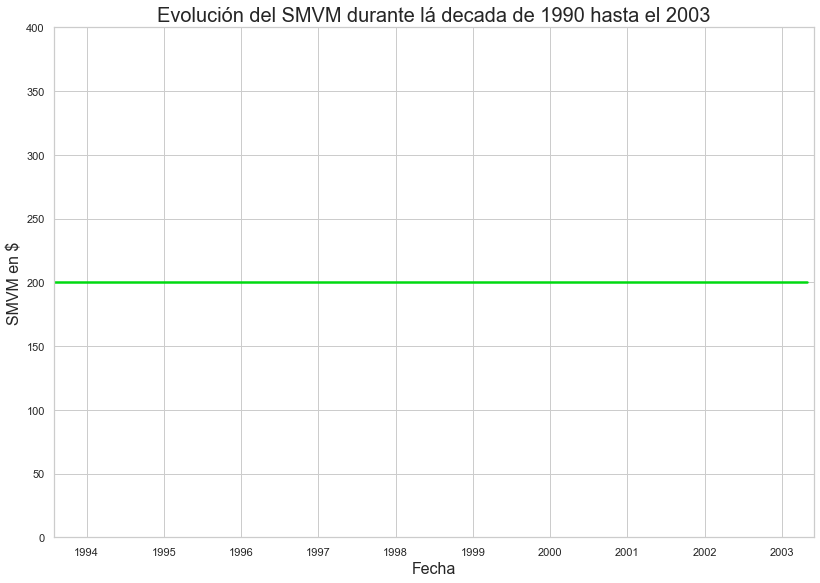

In [51]:
sns.set()
sns.set_style("whitegrid")

plt.figure(figsize=(11.69, 8.27))
plt.plot(noventas_a_2001.index, noventas_a_2001['salario_minimo_vital_movil_mensual'], color='#00d911', linewidth=2.5)

plt.title('Evolución del SMVM durante lá decada de 1990 hasta el 2003', fontdict={'fontsize': 20}, loc='center')
plt.xlabel('Fecha', size=16)
plt.ylabel('SMVM en $', size=16)

plt.tight_layout()
plt.xlim('1993-08-01', '2003-06-01')
plt.ylim(0, 400)

plt.savefig('SMVM1.png')

plt.show()

### Néstor Kirchner

El salario mínimo aumenta progresivamente para recuperar su poder adquisitivo luego de las devaluaciones posteriores a la crisis del 2001. Hacia finales del 2007, el valor nominal del salario mínimo casi se quintuplicó en pesos.

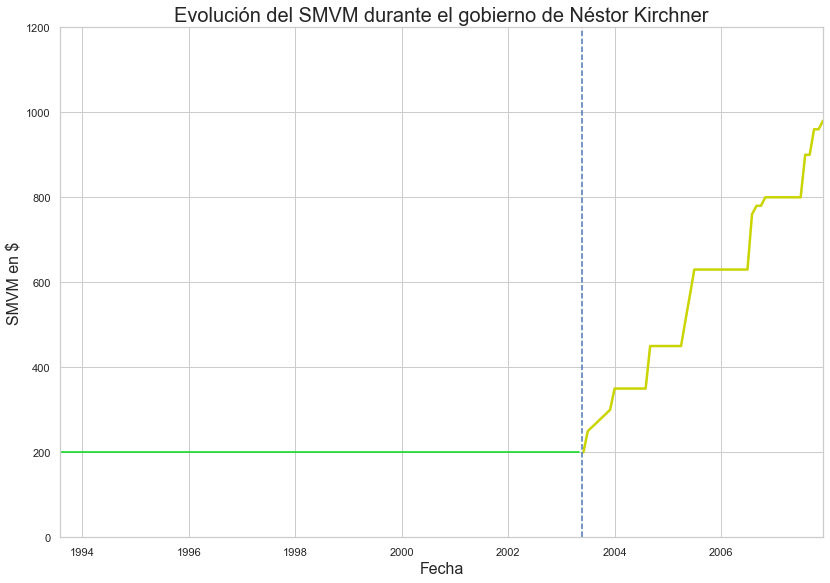

In [52]:
sns.set()
sns.set_style("whitegrid")

plt.figure(figsize=(11.69, 8.27))
plt.plot(noventas_a_2001.index, noventas_a_2001['salario_minimo_vital_movil_mensual'], color='#00d911')
plt.plot(nestor_kirchner.index, nestor_kirchner['salario_minimo_vital_movil_mensual'], color='#cad400', linewidth=2.5)

plt.title('Evolución del SMVM durante el gobierno de Néstor Kirchner', fontdict={'fontsize': 20}, loc='center')
plt.xlabel('Fecha', size=16)
plt.ylabel('SMVM en $', size=16)

plt.axvline(dt.datetime(2003, 5, 25), linestyle='--')

plt.tight_layout()
plt.xlim('1993-08-01', '2007-12-01')
plt.ylim(0, 1200)

plt.savefig('SMVM2.png')

plt.show()

### Cristina Fernández de Kirchner

En este período, el salario sigue aumentando nominalmente y, como veremos más adelante, también en términos reales. Inicia en valores cercanos a los \\$1000 y termina cerca de los \\$6000, es decir, casi se sextuplica en un período de 8 años.

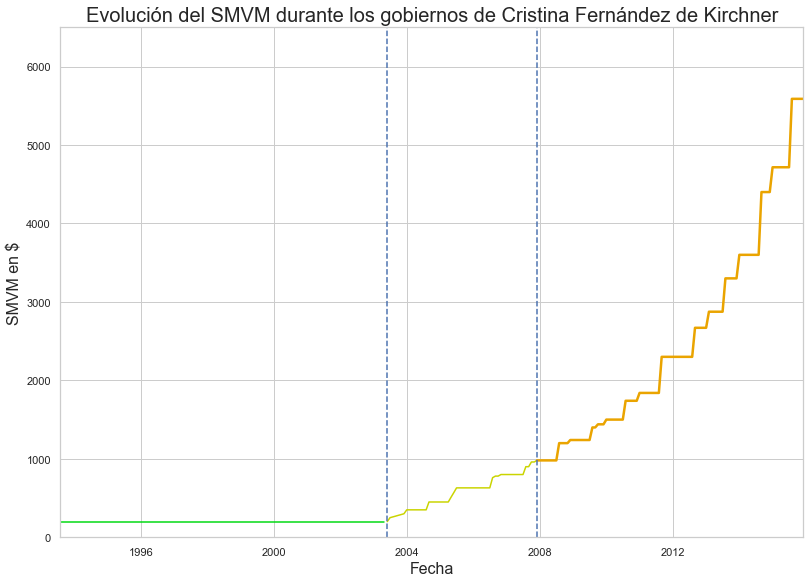

In [53]:
sns.set()
sns.set_style("whitegrid")

plt.figure(figsize=(11.69, 8.27))
plt.plot(noventas_a_2001.index, noventas_a_2001['salario_minimo_vital_movil_mensual'], color='#00d911')
plt.plot(nestor_kirchner.index, nestor_kirchner['salario_minimo_vital_movil_mensual'], color='#cad400')
plt.plot(cfk.index, cfk['salario_minimo_vital_movil_mensual'], color='#eaa400', linewidth=2.5)

plt.title('Evolución del SMVM durante los gobiernos de Cristina Fernández de Kirchner', fontdict={'fontsize': 20}, loc='center')
plt.xlabel('Fecha', size=16)
plt.ylabel('SMVM en $', size=16)

plt.axvline(dt.datetime(2003, 5, 25), linestyle='--')
plt.axvline(dt.datetime(2007, 12, 1), linestyle='--')

plt.tight_layout()
plt.xlim('1993-08-01', '2015-12-01')
plt.ylim(0, 6500)

plt.savefig('SMVM3.png')

plt.show()

### Mauricio Macri

Durante este gobierno, el salario mínimo en valores nominales superó los \\$17.000, casi triplicándose, pero en poder adquisitivo y valor real tocó mínimos históricos (nuevamente, como veremos más adelante).

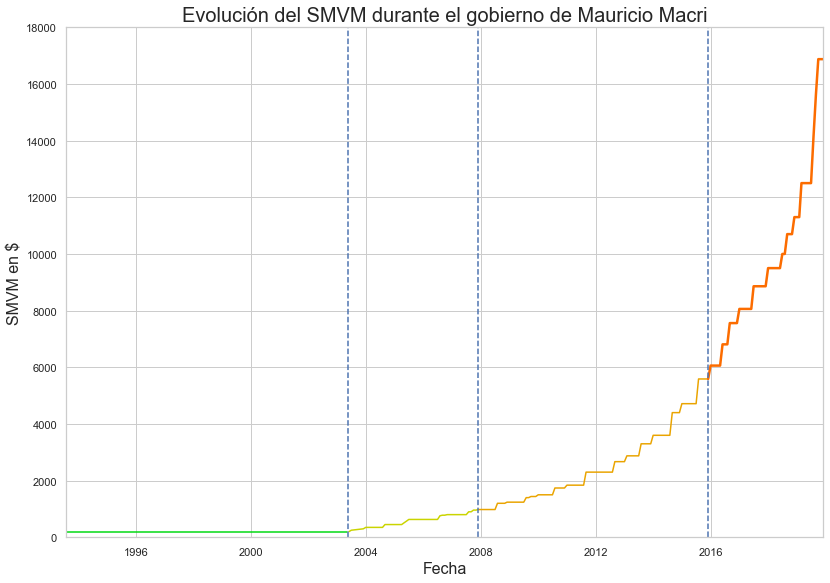

In [54]:
sns.set()
sns.set_style("whitegrid")

plt.figure(figsize=(11.69, 8.27))
plt.plot(noventas_a_2001.index, noventas_a_2001['salario_minimo_vital_movil_mensual'], color='#00d911')
plt.plot(nestor_kirchner.index, nestor_kirchner['salario_minimo_vital_movil_mensual'], color='#cad400')
plt.plot(cfk.index, cfk['salario_minimo_vital_movil_mensual'], color='#eaa400')
plt.plot(mauricio_macri.index, mauricio_macri['salario_minimo_vital_movil_mensual'], color='#fc6c00', linewidth=2.5)

plt.title('Evolución del SMVM durante el gobierno de Mauricio Macri', fontdict={'fontsize': 20}, loc='center')
plt.xlabel('Fecha', size=16)
plt.ylabel('SMVM en $', size=16)

plt.axvline(dt.datetime(2003, 5, 25), linestyle='--')
plt.axvline(dt.datetime(2007, 12, 1), linestyle='--')
plt.axvline(dt.datetime(2015, 12, 1), linestyle='--')

plt.tight_layout()
plt.xlim('1993-08-01', '2019-12-01')
plt.ylim(0, 18000)

plt.savefig('SMVM4.png')

plt.show()

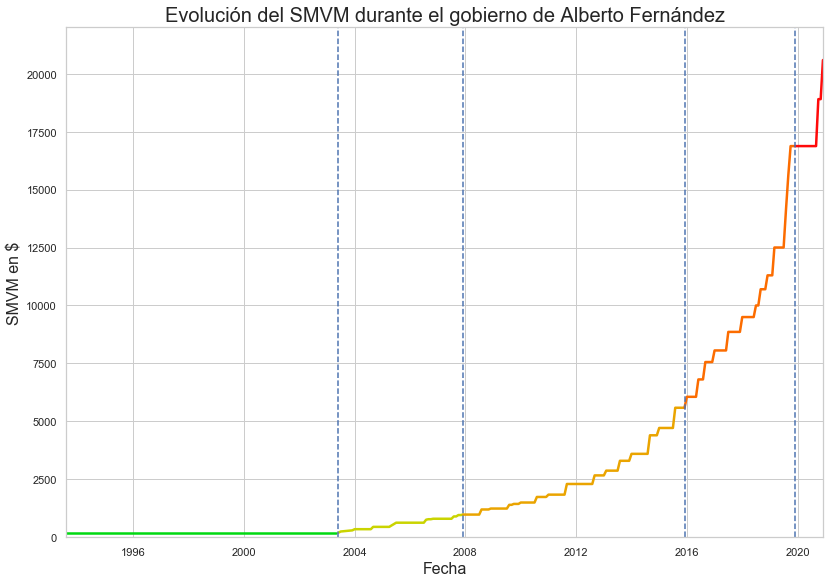

In [55]:
sns.set()
sns.set_style("whitegrid")

plt.figure(figsize=(11.69, 8.27))
plt.plot(noventas_a_2001.index, noventas_a_2001['salario_minimo_vital_movil_mensual'], color='#00d911', linewidth=2.5)
plt.plot(nestor_kirchner.index, nestor_kirchner['salario_minimo_vital_movil_mensual'], color='#cad400', linewidth=2.5)
plt.plot(cfk.index, cfk['salario_minimo_vital_movil_mensual'], color='#eaa400', linewidth=2.5)
plt.plot(mauricio_macri.index, mauricio_macri['salario_minimo_vital_movil_mensual'], color='#fc6c00', linewidth=2.5)
plt.plot(alberto_fernandez.index, alberto_fernandez['salario_minimo_vital_movil_mensual'], color='#ff0a0a', linewidth=2.5)

plt.title('Evolución del SMVM durante el gobierno de Alberto Fernández', fontdict={'fontsize': 20}, loc='center')
plt.xlabel('Fecha', size=16)
plt.ylabel('SMVM en $', size=16)

plt.axvline(dt.datetime(2003, 5, 25), linestyle='--')
plt.axvline(dt.datetime(2007, 12, 1), linestyle='--')
plt.axvline(dt.datetime(2015, 12, 1), linestyle='--')
plt.axvline(dt.datetime(2019, 12, 1), linestyle='--')

plt.tight_layout()
plt.xlim('1993-08-01', '2020-12-01')
plt.ylim(0, 22000)

plt.savefig('SMVM5.png')

plt.show()

## Análisis del salario mínimo vital y móvil en dólares

Si bien el salario mínimo aumentó nominalmente desde el 2003 en adelante, Argentina es un país con un índice inflacionario muy elevado. Además, durante ese período, el valor del dólar pasó de \\$1 a \\$81 (en su cotización A3500). Por eso, en esta última sección importamos el dataset con la cotización del dólar histórica para comparar con el salario mínimo.

Evitamos casi toda la primera época analizada en la sección anterior, que comprende los años 1993 a principios de 2002, puesto que regía la Ley de Convertibilidad y el salario nominal y en dólares era igual por definición. Lamentablemente el dataset únicamente contiene datos del dólar A3500 a partir del segundo trimestre de 2002 (ya efectiva gran parte de la devaluación brutal posterior a la crisis), así que tomamos a partir del primer dato no nulo de esa columna*.

Realizamos el mismo proceso que con el primer dataset: creación del DataFrame, conversión de índice a serie de tiempo, primer acercamiento a los datos, dropeo de columnas.

In [56]:
df2 = pd.read_csv('datos-tipo-cambio-usd-futuro-dolar-frecuencia-diaria.csv', index_col='indice_tiempo')
df2.index = pd.to_datetime(df2.index)

In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6847 entries, 2002-03-05 to 2020-12-01
Data columns (total 17 columns):
tipo_cambio_bna_vendedor         2221 non-null float64
tipo_cambio_a3500                6847 non-null float64
tipo_cambio_mae                  4536 non-null float64
volumen_mae                      3038 non-null float64
tipo_cambio_implicito_en_adrs    6845 non-null float64
futuro_rofex_usd1m               4351 non-null float64
interes_abierto_1m               4351 non-null float64
futuro_rofex_usd2m               4351 non-null float64
interes_abierto_2m               4351 non-null float64
futuro_rofex_usd3m               4351 non-null float64
interes_abierto_3m               4351 non-null float64
futuro_rofex_usd4m               4351 non-null float64
interes_abierto_4m               4351 non-null float64
futuro_rofex_usd5m               4351 non-null float64
interes_abierto_5m               4351 non-null float64
futuro_rofex_usd6m               4351 non-null flo

In [58]:
df2.head()

,tipo_cambio_bna_vendedor,tipo_cambio_a3500,tipo_cambio_mae,volumen_mae,tipo_cambio_implicito_en_adrs,futuro_rofex_usd1m,interes_abierto_1m,futuro_rofex_usd2m,interes_abierto_2m,futuro_rofex_usd3m,interes_abierto_3m,futuro_rofex_usd4m,interes_abierto_4m,futuro_rofex_usd5m,interes_abierto_5m,futuro_rofex_usd6m,interes_abierto_6m
indice_tiempo,,,,,,,,,,,,,,,,,
2002-03-05,NaN,1.9917,NaN,NaN,2.180124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-06,NaN,2.0508,NaN,NaN,2.222222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-07,NaN,2.1375,NaN,NaN,2.343949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-08,NaN,2.2033,NaN,NaN,2.227778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-09,NaN,2.2033,NaN,NaN,2.227778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df2.drop(df2.columns.difference(['tipo_cambio_a3500']), 1, inplace=True)

Construímos el nuevo DataFrame concatenando horizontalmente los de salario y tipo de cambio y dropeamos todos los valores no nulos. También construímos una nueva columna, 'smvm_en_usd', cuyos valores son el salario mínimo vital y móvil dividido la cotización del dólar A3500. Es decir, es el monto del salario en dólares.

In [60]:
df3 = pd.concat([df1, df2], axis=1)
df3 = df3.loc['1993-08-01':'2020-12-01']
df3 = df3[df3['salario_minimo_vital_movil_mensual'].notna()]
df3['smvm_en_usd'] = df3['salario_minimo_vital_movil_mensual']/df3['tipo_cambio_a3500']

smvm_en_usd = df3.dropna()
smvm_en_usd.head(25)

,salario_minimo_vital_movil_mensual,tipo_cambio_a3500,smvm_en_usd
indice_tiempo,,,
2002-04-01,200.0,2.8517,70.133605
2002-05-01,200.0,2.9167,68.570645
2002-06-01,200.0,3.5750,55.944056
2002-07-01,200.0,3.7912,52.753746
2002-08-01,200.0,3.6333,55.046377
2002-09-01,200.0,3.6250,55.172414
2002-10-01,200.0,3.7417,53.451640
2002-11-01,200.0,3.5182,56.847251
2002-12-01,200.0,3.5962,55.614259


In [61]:
df3.tail(10)

,salario_minimo_vital_movil_mensual,tipo_cambio_a3500,smvm_en_usd
indice_tiempo,,,
2020-03-01,16875.0,62.2080,271.267361
2020-04-01,16875.0,64.5295,261.508302
2020-05-01,16875.0,66.8350,252.487469
2020-06-01,16875.0,68.6250,245.901639
2020-07-01,16875.0,70.5150,239.310785
2020-08-01,16875.0,72.3150,233.354076
2020-09-01,16875.0,74.2450,227.288033
2020-10-01,18900.0,76.2450,247.885107
2020-11-01,18900.0,78.3283,241.292100


In [62]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 329 entries, 1993-08-01 to 2020-12-01
Data columns (total 3 columns):
salario_minimo_vital_movil_mensual    329 non-null float64
tipo_cambio_a3500                     225 non-null float64
smvm_en_usd                           225 non-null float64
dtypes: float64(3)
memory usage: 10.3 KB


### Salario mínimo vital y móvil en dólares

Como se observa en el gráfico, el salario en dólares se recuperó fuertemente durante los gobiernos de Néstor Kirchner y Cristina Fernández de Kirchner. Sin embargo, es importante destacar que durante los gobiernos de Cristina Fernández se instauraron restricciones para la compra de divisa extranjera (el llamado "cepo al dólar") que hizo que la cotización se mantuviera artificialmente estable.

Luego, durante el gobierno de Mauricio Macri, se eliminaron dichas restricciones y el peso se devaluó fuertemente y su gobierno estuvo afectado por sucesivas devaluaciones que hicieron caer el valor del salario mínimo.

Finalmente, con el gobierno de Alberto Fernández volvieron las restricciones a la compra de dólares, incluso con el agregado de pago de impuestos adicionales por la compra, como el impuesto solidario y el pago de ganancias, lo que hizo que su cotización efectiva estuviera en torno a los \\$140 a la fecha de elaboración de este informe. Pero la crisis económica que arrastraba el país, sumada a la pandemia que afectó a todas las economías globales, profundizó el deterioro del valor del salario.

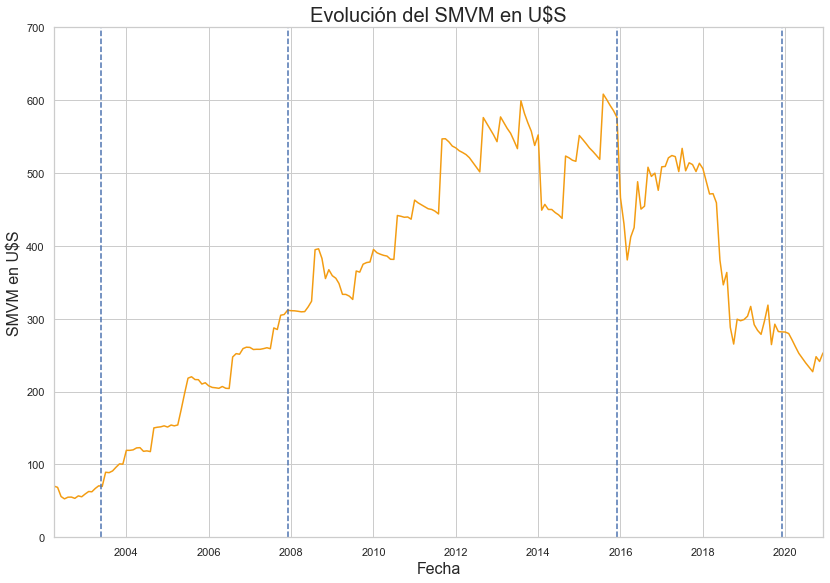

In [63]:
sns.set()
sns.set_style("whitegrid")

plt.figure(figsize=(11.69, 8.27))
plt.plot(df3.index, df3['smvm_en_usd'], color='#F39C12')


plt.title('Evolución del SMVM en U$S', fontdict={'fontsize': 20}, loc='center')
plt.xlabel('Fecha', size=16)
plt.ylabel('SMVM en U$S', size=16)

plt.axvline(dt.datetime(2003, 5, 25), linestyle='--')
plt.axvline(dt.datetime(2007, 12, 1), linestyle='--')
plt.axvline(dt.datetime(2015, 12, 1), linestyle='--')
plt.axvline(dt.datetime(2019, 12, 1), linestyle='--')

#plt.legend()

plt.tight_layout()
plt.xlim('2002-04-01', '2020-12-01')
plt.ylim(0, 700)

plt.savefig('SMVM6.png')

plt.show()